In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
data = pd.read_csv('train.csv',index_col=0)

In [21]:
data.head(2)

,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
project_id,,,,,,,,,,,,,
kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0


## Data Preparation 

In [23]:
#Changing dtype
# Convert columns into date columns

In [25]:
from datetime import datetime as dt
data.deadline =pd.to_datetime(data['deadline'],unit='s')#.dt.strftime('%Y%m%d')
data.state_changed_at =pd.to_datetime(data['state_changed_at'],unit='s')#.dt.strftime('%Y%m%d')
data.created_at =pd.to_datetime(data['created_at'],unit='s')#.dt.strftime('%Y%m%d')
data.launched_at =pd.to_datetime(data['launched_at'],unit='s')#.dt.strftime('%Y%m%d')

In [27]:
#add new columns 

In [26]:
data['Start2Finsih']= data.deadline - data.created_at
data['Launch2Finsih']= data.deadline - data.launched_at
data['Launch2Status']= data.state_changed_at - data.launched_at
data['Create2Launch']= data.launched_at -data.created_at
#train['Finish2Status']= train.state_changed_at -train.deadline

In [28]:
data['Start2Finsih'] = data['Start2Finsih'].dt.days
data['Launch2Finsih']= data['Launch2Finsih'].dt.days
data['Launch2Status']= data['Launch2Status'].dt.days
data['Create2Launch']= data['Create2Launch'].dt.days
#train['Finish2Status']= train['Finish2Status'].dt.days

In [29]:
data = data.drop(['name','desc','keywords'],axis=1)

In [30]:
data['disable_communication']= data['disable_communication'].astype('str')
data['disable_communication'] = data['disable_communication'].replace(to_replace=['False', 'True'], value=[0, 1])

In [32]:
data.head(2)

,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,Start2Finsih,Launch2Finsih,Launch2Status,Create2Launch
project_id,,,,,,,,,,,,,,
kkst1451568084,20.0,0,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,8,8,8,0
kkst1474482071,300.0,0,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0,16,16,16,0


In [33]:
#missing values

In [34]:
data.isnull().sum().sum()

0

In [43]:
print(data.shape)


(108129, 14)


How many Project were successfully achieve their goals?

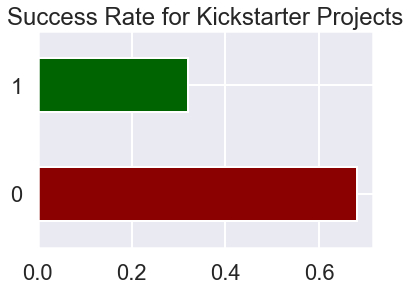

In [19]:
sns.set_style('darkgrid')
sns.set_context('poster') 
colormap = ['darkred','darkgreen']
data.final_status.value_counts(normalize=True).plot(kind='barh',title='Success Rate for Kickstarter Projects',color=colormap)

How long was the deadline?

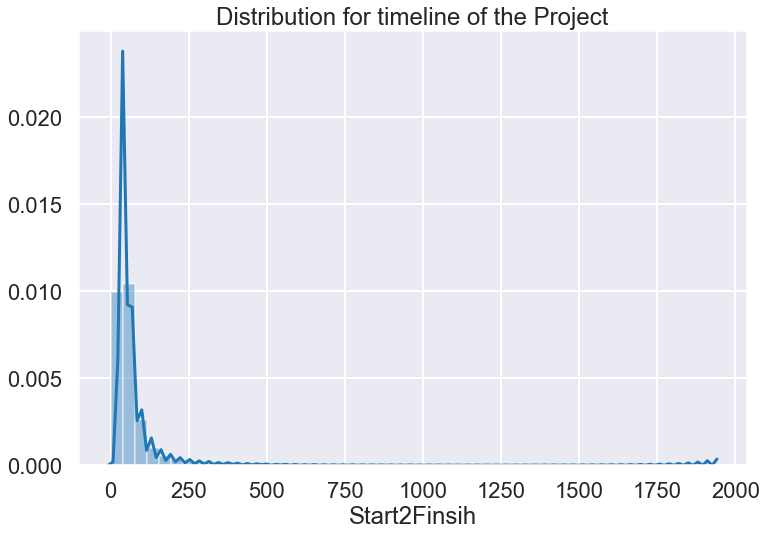

In [38]:
plt.figure(figsize=(12,8))
sns.distplot(data['Start2Finsih'])
plt.title('Distribution for timeline of the Project')
plt.show()

In [36]:
data['Start2Finsih'].describe()

count    108129.000000
mean         71.414903
std          88.126569
min           1.000000
25%          33.000000
50%          47.000000
75%          71.000000
max        1932.000000
Name: Start2Finsih, dtype: float64

# Outliers

In [39]:
IQR = data.Start2Finsih.quantile(0.75) - data.Start2Finsih.quantile(0.25)
Q1 = data.Start2Finsih.quantile(0.25)
Q3 = data.Start2Finsih.quantile(0.75)

In [41]:
new_file = data[(data['Start2Finsih'] >= (Q1 - 1.5 * IQR)) & (data['Start2Finsih'] <= (Q3 + 1.5 * IQR))]

In [42]:
print('After Removing Outliers :',new_file.shape)


After Removing Outliers : (97604, 14)


Text(0.5, 1.0, 'Distribution for timeline of the Project - Without Outliers')

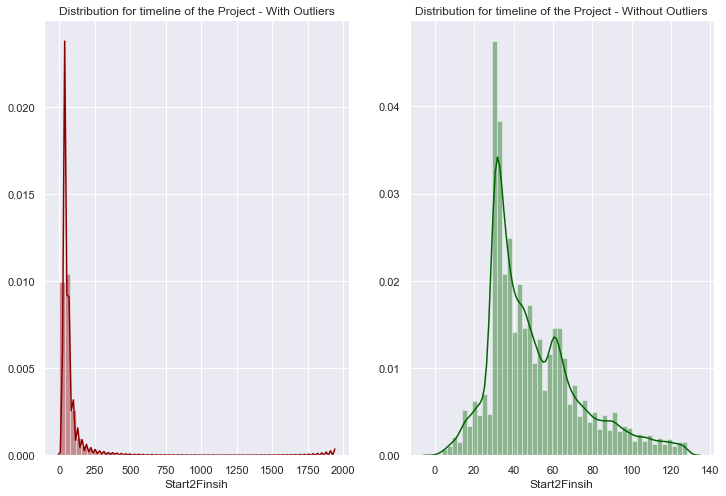

In [116]:
sns.set(style="darkgrid")
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig,ax=plt.subplots(1,2,figsize=(12,8),squeeze=False)

sns.distplot(data.Start2Finsih,ax=ax[0][0], color='darkred')
sns.distplot(new_file.Start2Finsih,ax=ax[0][1], color='darkgreen')

ax[0][0].set_title('Distribution for timeline of the Project - With Outliers')
ax[0][1].set_title('Distribution for timeline of the Project - Without Outliers')

### Duration vs Success Rate

In [54]:
new_file.head()

,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,Start2Finsih,Launch2Finsih,Launch2Status,Create2Launch
project_id,,,,,,,,,,,,,,
kkst1451568084,20.0,0,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,8,8,8,0
kkst1474482071,300.0,0,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0,16,16,16,0
kkst183622197,30.0,0,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58,0,0,9,9,9,0
kkst597742710,500.0,0,US,USD,2009-05-29 00:09:00,2009-05-29 00:15:21,2009-04-29 00:09:55,2009-04-29 00:58:50,18,1,29,29,29,0
kkst1913131122,2000.0,0,US,USD,2009-05-31 11:38:00,2009-05-31 11:45:17,2009-05-01 11:38:34,2009-05-01 12:22:21,1,0,29,29,29,0


Text(0.5, 1.0, 'Distribution for timeline of successful Project')

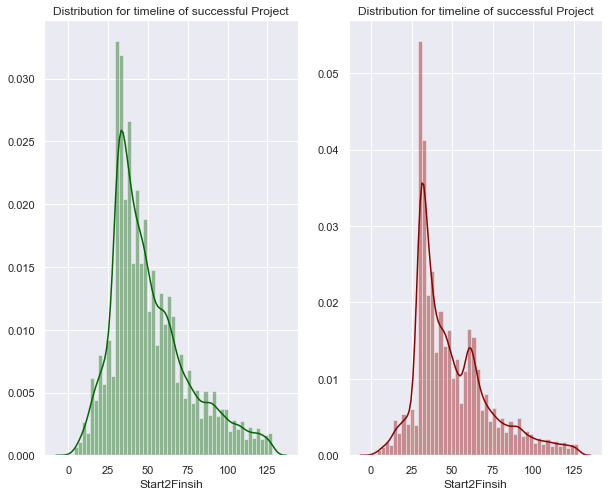

In [115]:
target_1 = new_file[new_file['final_status'] == 1]
target_0 = new_file[new_file['final_status'] == 0]
fig,ax=plt.subplots(1,2,figsize=(10,8),squeeze=False)
#sns.set_context('poster') 

sns.distplot(target_1['Start2Finsih'],ax=ax[0][0], color='darkgreen')
sns.distplot(target_0['Start2Finsih'],ax=ax[0][1], color='darkred')

ax[0][0].set_title('Distribution for timeline of successful Project')
ax[0][1].set_title('Distribution for timeline of successful Project')

How many people backed the projects?

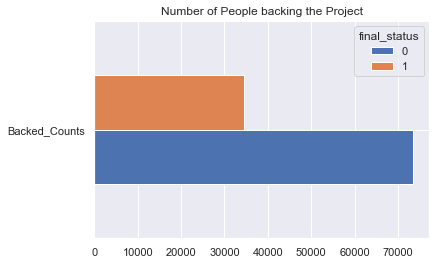

In [63]:
tab = pd.crosstab(data.backers_count.mean(),data.final_status)
tab = tab.reset_index()
tab = tab.rename({0:'Backed_Counts'})
tab[[0, 1]].plot(kind='barh',title='Number of People backing the Project')

What country most likely to back the project? 

Text(0, 0.5, 'Country')

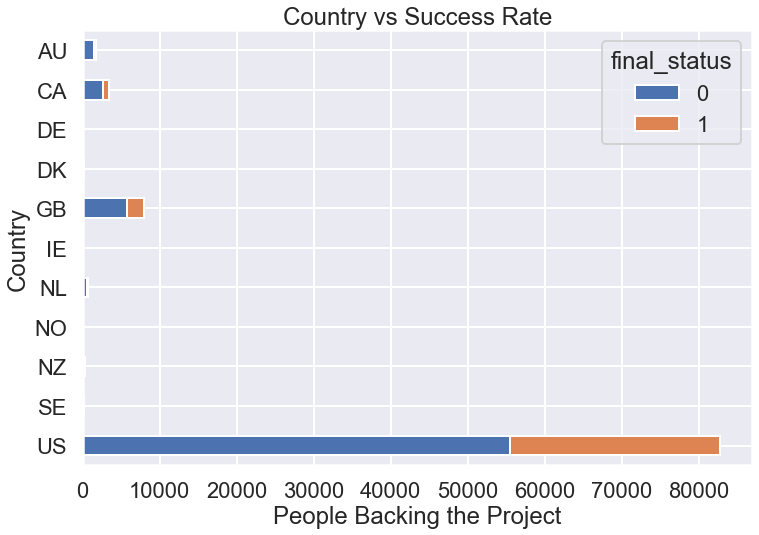

In [101]:
sns.set_context('poster') 
pd.crosstab(new_file.country,new_file.final_status).sort_values(by='country',ascending=False).plot(kind='barh', stacked=True,title='Country vs Success Rate',figsize=(12,8))
plt.xlabel('People Backing the Project')
plt.ylabel('Country')

US,GB and canada are most likely to back the Kickstarter Projects.

In [80]:
table = pd.pivot_table(new_file, values='goal', columns=['country'], aggfunc=np.mean)
table

country,AU,CA,DE,DK,GB,IE,NL,NO,NZ,SE,US
goal,104947.134812,37512.789941,3000.0,692268.776596,28866.039277,135230.647619,133331.308271,162227.159292,17265.078078,166058.042194,31964.510763


In [82]:
new_file.goal.describe()

count    9.760400e+04
mean     3.571612e+04
std      9.668802e+05
min      1.000000e-02
25%      1.600000e+03
50%      5.000000e+03
75%      1.200000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [83]:
def target(row):
    if row['goal'] <10000:
        return '0-9,999'
    elif row['goal'] >10000 and row['goal']<100000:
        return '10,000-99,000'
    elif row['goal'] >100000 and row['goal']<250000:
        return '100,000-249,999'
    elif row['goal'] >250000 and row['goal']<500000:
        return '250,000-499,999'
    elif row['goal'] >500000 and row['goal']<750000:
        return '500,000-750,000'
    elif row['goal'] >750000 and row['goal']<1000000:
        return '750,000-999,999'
    elif row['goal']>999999:
        return 'Over 1 Million'


In [84]:
new_file['Category_goal'] = new_file.apply(target,axis=1)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Goal')

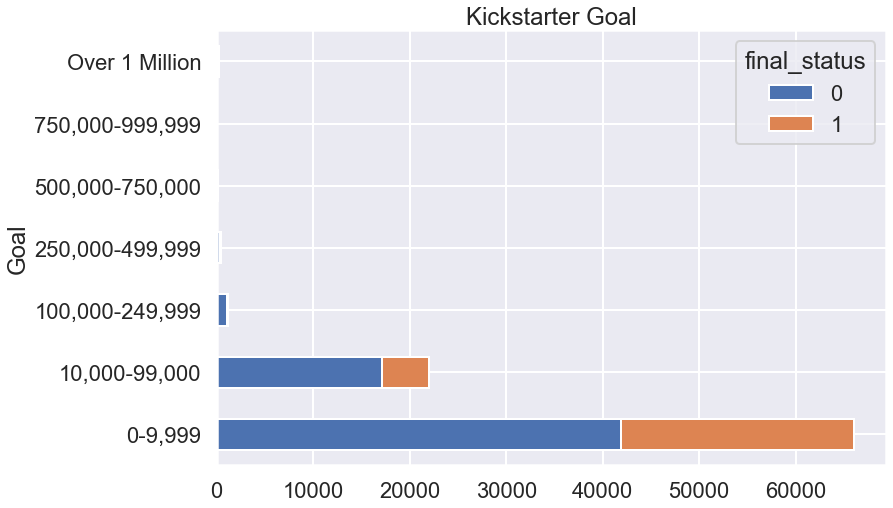

In [108]:
sns.set_context('poster') 
pd.crosstab(new_file.Category_goal , new_file.final_status).plot(kind='barh',stacked=True,figsize=(12,8),title='Kickstarter Goal')
plt.ylabel('Goal')

Project under $10,000 are not only more likely to be backed but also has higher chance of achieving their goal. 

In [86]:
new_file.backers_count.describe()

count     97604.000000
mean        115.022520
std        1191.073744
min           0.000000
25%           2.000000
50%          16.000000
75%          60.000000
max      219382.000000
Name: backers_count, dtype: float64